In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
from matplotlib.pylab import rcParams
import warnings
import itertools
import statsmodels.api as sm
import itertools
from sklearn import metrics
import gc
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def savepic(name):
  print("Do you wanna download the output picture")
  if input() == 'Yes':
    plt.savefig(name+".png")
    files.download(name+".png") 
  else:
    print("Thanks for typing")

In [0]:
Dec = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Dec.csv')
Feb = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Feb.csv')
Jan = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Jan.csv')
Nov = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Nov.csv')

In [0]:
Dec['Time'] = Dec['Date']+str(' ')+Dec['Time']
Nov['Time'] = Nov['Date']+str(' ')+Nov['Time']
Jan['Time'] = Jan['Date']+str(' ')+Jan['Time']
Feb['Time'] = Feb['Date']+str(' ')+Feb['Time']

In [7]:
for i in [Dec,Feb,Jan,Nov]:
  i['Time'] = pd.to_datetime(i['Time'])
  i['Temperature'] = i['Temperature (F)']
  i.drop(['Date','Temperature (F)','Zone'], axis=1,inplace=True)  # Dropping the other columns
  i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25488 entries, 0 to 25487
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         25488 non-null  datetime64[ns]
 1   Temperature  25488 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 398.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         8008 non-null   datetime64[ns]
 1   Temperature  8008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 125.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35364 entries, 0 to 35363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         35364 non-null  datetime64[ns]
 1   Temperature 

In [8]:
for i in [Dec,Jan,Feb,Nov]:
  i.set_index('Time',inplace=True)
  print(i.isnull().sum())

Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64
Temperature    0
dtype: int64


In [0]:
# Optimal Parameters for ARIMA
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [0]:
# from tqdm import tqdm
# p_values = [1, 2, 3, 4, 5]
# d_values = range(0, 3) #this is the range for the values
# q_values = range(0, 3) #this is the range for the values
# re = dict()
# for p in tqdm(p_values):
#   for d in tqdm(d_values):
#     for q in tqdm(q_values):
#       order = (p,d,q)
#       model = ARIMA(Datalog, order=(p,d,q))
#       results_ARIMA = model.fit(disp=-1)
#       re[str(order)] = sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2)
#       print('Order is ',order)
#       print('RSS: %.4f'%sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2))



In [10]:
print('The optimal grid search parameters for  Arima are')
print('Optimal parameters are (1,2,0)')

The optimal grid search parameters for  Arima are
Optimal parameters are (1,2,0)


In [12]:
# Searching Optimal Parameters for SARIMA
# From the above 'acf' and 'pacf' we can say the seasonality to be '2'.
import itertools
import statsmodels.api as sm
p = range(1,4)
d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print(len(seasonal_pdq))
print('144 total combinations')

Examples of parameter for SARIMA...
SARIMAX: (1, 0, 1) x (1, 0, 1, 2)
SARIMAX: (1, 0, 1) x (1, 1, 0, 2)
SARIMAX: (1, 1, 0) x (1, 1, 1, 2)
SARIMAX: (1, 1, 0) x (2, 0, 0, 2)
12
144 total combinations


In [0]:
# # According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality 
# # of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of
# # each model, relative to each of the other models. The low AIC value the better. 
# from tqdm import tqdm
# aic = dict()
# a = []
# for param in tqdm(pdq):
#     for param_seasonal in tqdm(seasonal_pdq):
#         s = str(param)+' '+str(param_seasonal)
#         if s not in a:
#           a.append(s)
#           try:
#               smodel = sm.tsa.statespace.SARIMAX(Data,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#               results = smodel.fit()
#               print('ARIMA{}x{}1 - AIC:{}'.format(param,param_seasonal,results.aic))
#               aic[s] = results.aic
#               print(aic[s])
#           except: 
#               continue
#         else:
#           continue

In [0]:
class Raptors_Clean():
  months = ['nov', 'dec', 'jan', 'feb']
  df_names = [ ]

  def __init__(self,nov,dec,jan,feb):
    self.df_names = [nov,dec,jan,feb]


  def getOutlierBoundaryConditions(self,dataset):
      q75, q25 = np.percentile(dataset['Temperature'], [75, 25])
      IQR = q75 - q25

      lower_bound = q25 - (1.5 * IQR)
      upper_bound = q75 + (1.5 * IQR)

      filter1 = dataset['Temperature'] < lower_bound
      filter2 = dataset['Temperature'] > upper_bound

      print(q75)
      print(q25)
      return [filter1, filter2]

  def applyOutlierBoundaryConditions(self,dataset):
    onestConditions = self.getOutlierBoundaryConditions(dataset)
    # Replace values below Q1 - (1.5 * IQR) with Q1 i.e.25th Percentile
    dataset.loc[onestConditions[0]] = 38.7 
    # Replace values above Q3 + (1.5 * IQR) with  Q3 i.e.75th Percentile
    dataset.loc[onestConditions[1]] = 39.9
    dataset.loc[onestConditions[0] | onestConditions[1]]
    #lstConditions = self.getOutlierBoundaryConditions(data_imputed)
    #dataset.loc[lstConditions[0] | lstConditions[1]]
    return dataset

    




  def FillMissingValues(self):
      data_full = pd.DataFrame(columns = ['Time','Temperature'])
      for month, name in zip(self.months,self.df_names):
          month = name.groupby(pd.Grouper(freq='1Min'))
          new_df = pd.DataFrame(columns = ['Time','Temperature'])
          for name, group in month:
              if (len(group.values.flatten()) == 0):
                  new_df = new_df.append({'Time':name,'Temperature':np.nan}, ignore_index=True)
              else:
                  new_df = new_df.append({'Time':name,'Temperature':group.values.flatten()[0]}, ignore_index=True)
                
    
          #data_full has the continuous data with nan values            
          data_full = pd.concat([data_full, new_df], sort=False, ignore_index=True)
      data_full.set_index('Time', drop=True, append=False, inplace=True, verify_integrity=False)
      print('Missing Values in the dataset',data_full.isnull().sum())
      imputer = KNNImputer(n_neighbors=15, weights="uniform")
      imputed_values = imputer.fit_transform(data_full)
      #convert the numeric columns after imputation to a dataframe  
      #data_imputed is complete datset imputed with KNN imputation values
      data_imputed = pd.DataFrame(imputed_values, columns=['Temperature'])
      data_imputed.index = data_full.index
      print('Missing Values in the dataset after imputation',data_imputed.isnull().sum())
      return data_imputed
    

In [15]:
cleaner = Raptors_Clean(Nov,Dec,Jan,Feb)
Data = cleaner.FillMissingValues()

Missing Values in the dataset Temperature    30841
dtype: int64
Missing Values in the dataset after imputation Temperature    0
dtype: int64


In [16]:
onestConditions = cleaner.getOutlierBoundaryConditions(Data)
Data.loc[onestConditions[0] | onestConditions[1]]

39.9
38.7


,Temperature
Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2
...,...
2020-02-06 12:42:00,36.9
2020-02-06 13:57:00,44.6
2020-02-06 13:58:00,48.4


In [0]:
# Replace values below Q1 - (1.5 * IQR) with Q1 i.e.25th Percentile
Data.loc[onestConditions[0]] = 38.7 
# Replace values above Q3 + (1.5 * IQR) with  Q3 i.e.75th Percentile
Data.loc[onestConditions[1]] = 39.9

In [18]:
onestConditions = cleaner.getOutlierBoundaryConditions(Data)
Data.loc[onestConditions[0] | onestConditions[1]]

39.9
38.7


,Temperature
Time,


In [0]:
class Raptorsforecast():
  '''
 'Enter Model (LR|KNN|DT|SVR|RF)'
  '''
  models = dict()
  dataset = pd.DataFrame()
  train_split = 0.70
  test_split = 0.30
  
  def __init__(self,data):
    self.dataset = data
    self.models['LR'] = LinearRegression()
    self.models['KNN'] = KNeighborsRegressor()
    self.models['DT'] = DecisionTreeRegressor()
    self.models['SVR'] = SVR()
    self.models['RF'] = RandomForestRegressor()
  
  def forecastArima(self,forecast_out):
    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    # Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:]
    xlog = pd.DataFrame(np.log(X),columns=['Temperature'])
    x_log_shift = xlog - xlog.shift()
    x_log_shift.dropna(inplace=True)
    model = ARIMA(x_log_shift, order=(1,2,0))
    print('Plotting ARIMA model fit')
    results_ARIMA = model.fit(disp=-1)
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(xlog['Temperature'].iloc[0], index=xlog.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)  
    predictions_ARIMA = np.exp(predictions_ARIMA_log) - 27
    # There is bias in the model, with certain mean, Adjusting for bias is easy: if the residuals have mean  m, then simply add/sub m to all forecasts and the bias problem is solved. 
    plt.plot()
    plt.plot(predictions_ARIMA)
    savepic('arima_fitted')
    train_fitted = predictions_ARIMA
    actual = X
    mse = ((train_fitted - actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(actual,train_fitted))
    results_ARIMA.plot_predict(133800,133927) 
    savepic('predict_'+str(forecast_out))
    x=results_ARIMA.forecast(steps=forecast_out)
    xexp = np.exp(x[1])
    mse = ((xexp - y_actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(y_actual,xexp))





  def forecastSarima(self,forecast_out):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of Seasonal Arima model with Optimal Parameters
    Also returns the np.array for next forecasted values and actual values.
    '''
    print('Forecasting for next '+str(forecast_out))
    #Remove the last 'forecast' rows
    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    # Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:] 
    # Fitting the ARIMA model.
    mod = sm.tsa.statespace.SARIMAX(X,
                                order=(3, 0, 1),
                                seasonal_order=(3,1, 1,1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    #dataset.drop(['Pre_'+str(forecast_out)],inplace=True,axis=1)
    print(results.summary().tables[1])
    d = results.plot_diagnostics(figsize=(20, 8))
    savepic('sarima_fit')
    plt.show()
    x_fitted = results.fittedvalues
    # Metrics of RMSE & Mean Absolute Error
    print('Data fit metrics')
    print('Mean Absolute Error: ',metrics.mean_absolute_error(X,x_fitted))
    print('Mean Squared Error: ',metrics.mean_squared_error(X,x_fitted))
    print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(X,x_fitted)))
    print('R Square Error (Percentage of Variance explained.)',metrics.r2_score(X,x_fitted))
    # Forecasting Using Forecast method
    y_forecasted = pd.DataFrame(results.forecast(steps = forecast_out), columns=['Temperature'])
    y_forecasted.reset_index(drop=True)
    print('Data Forecast metrics')
    print('Forecast RMSE ',np.sqrt(metrics.mean_squared_error(y_actual,y_forecasted['Temperature'])))
    print('Forecast R Square ',metrics.r2_score(y_actual,y_forecasted['Temperature']))
    return y_forecasted,y_actual

    
  def iterateResults(self,model_type):
    outputs_iter = dict()
    actual_iter = dict()
    if model_type=='linear_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Linear Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'LR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type == 'sarima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of SARIMA forecasting next '+str(i)+' values.')
        outputf,inputf = self.forecast_sarima(i)
        if ((i not in outputs_iter.keys()) and (i not in actual_iter.keys())):
          outputs_iter[i] = outputf
          actual_iter[i] = inputf
      
        print('#'*20)
        print('-'*20)
        print('#'*20)
      return outputs_iter,actual_iter
    elif model_type=='decision_tree':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Decision Tree forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'DT')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='random_forest':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Random Forest forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'RF')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='support_vector_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Support Vector Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'SVR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='k_nearest_neighbors':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of K Nearest Neighbors forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'KNN')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='arima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Arima forecasting next '+str(i)+'values.')
        self.forecastArima(i)
        print('#'*20)
        print('-'*20)
        print('#'*20)
    else:
      print("Enter valid Model Type !, ('sarima' or 'linear_regression' or 'decision_tree or k_nearest_neighbors','support_vector_regression','random_forest')")

  # def createDataset(self,forecast_out):
  #   self.dataset['Pre_'+str(forecast_out)] = self.dataset['Temperature'].shift(-forecast_out)
  #   X = np.array(self.dataset.drop(['Pre_'+str(forecast_out)],1))
  #   #Remove the last '1' rows
  #   X = X[:-forecast_out]
  #   y = np.array(self.dataset['Pre_'+str(forecast_out)])
  #   # Get all of the y values except the last '1' rows
  #   y = y[:-forecast_out] # In order to train the data, we have the target variable ready
  #   # Split the data into 80% training and 20% testing
  #   self.dataset.drop(['Pre_'+str(forecast_out)],axis=1,inplace=True)
  #   return X,y
  def create_dataset(self, data,forecast_out):
    dataX, dataY = [], []
    
    for i in range(len(data)-forecast_out):
        
        a = data[i:(i+forecast_out), 0]        
        dataX.append(a)
        dataY.append(data[i + forecast_out, 0])
    
    return np.array(dataX), np.array(dataY)

  def minmaxscaler(self):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = scaler.fit_transform(self.dataset)
    train_size = int(len(scaled) * self.train_split)
    test_size = len(scaled - train_size)
    train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
    return train,test
  def machineLearinigModels(self,forecast_out,modelname):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of regression model with Optimal Parameters
    Also returns the np.array for next forecasted values.
    '''
    train,test = self.minmaxscaler()
    X_train, y_train = self.create_dataset(train, forecast_out)
    X_test, y_test = self.create_dataset(test, forecast_out)
    #X,y = self.createDataset(forecast_out)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Create and train the Linear Regression  Model
    # Train the model
    print('Prediction Using ',modelname)
    dict_metrics = {}
    model = self.models[modelname]
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_test  = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    dict_metrics = {
        'Values Forecasted' : forecast_out,
        'Model Name' : modelname,
        'Train RMSE' : rmse_train,
        'Train R2 Score' : metrics.r2_score(y_train, y_pred_train),
        'Test RMSE' : rmse_test,
        'Test R2 Score' : metrics.r2_score(y_test, y_pred_test)
                      }
    for k,d in dict_metrics.items():
      print(str(k)+ ' : '+str(d))
  
  
  
  def correlationLag(self):
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset['Pre_'+str(i)] = self.dataset['Temperature'].shift(-i)
    sns.heatmap(dataset.corr())
    plt.show()
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset.drop(['Pre_'+str(i)],inplace=True,axis=1)

  

In [0]:
# Below are example functions 
forecast = Raptorsforecast(Data) # Creating object 

In [25]:
forecast.machineLearinigModels(10,'LR') # Forecasting metrics for next 10 values using Linear Regression

Prediction Using  LR
Values Forecasted : 10
Model Name : LR
Train RMSE : 0.07580099229609408
Train R2 Score : 0.8370159124439456
Test RMSE : 0.07842349826083267
Test R2 Score : 0.873433392348593


In [26]:
forecast.machineLearinigModels(10,'DT') # Forecasting metrics for next 10 values using Decision tree

Prediction Using  DT
Values Forecasted : 10
Model Name : DT
Train RMSE : 0.0317566458061162
Train R2 Score : 0.97139350336981
Test RMSE : 0.10035762257516774
Test R2 Score : 0.7927342955649919


In [27]:
forecast.iterateResults('linear_regression') # Forecasts values for all window sizes using Linear Regression

Results of Linear Regression forecasting next 1 values.
Prediction Using  LR
Values Forecasted : 1
Model Name : LR
Train RMSE : 0.07704286046164971
Train R2 Score : 0.8316215700109095
Test RMSE : 0.08068059517511315
Test R2 Score : 0.8661213420473213
####################
--------------------
####################
Results of Linear Regression forecasting next 5 values.
Prediction Using  LR
Values Forecasted : 5
Model Name : LR
Train RMSE : 0.07608422568359971
Train R2 Score : 0.8357901333446525
Test RMSE : 0.07915710354787896
Test R2 Score : 0.8711020259080826
####################
--------------------
####################
Results of Linear Regression forecasting next 10 values.
Prediction Using  LR
Values Forecasted : 10
Model Name : LR
Train RMSE : 0.07580099229609408
Train R2 Score : 0.8370159124439456
Test RMSE : 0.07842349826083267
Test R2 Score : 0.873433392348593
####################
--------------------
####################
Results of Linear Regression forecasting next 15 values.


Forecasting for next 30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4655      0.028     16.355      0.000       0.410       0.521
ar.L2          0.0583      0.002     23.599      0.000       0.053       0.063
ar.L3          0.0145      0.001     14.163      0.000       0.013       0.017
ma.L1         -0.5491      0.028    -19.355      0.000      -0.605      -0.494
ar.S.L1        0.4655      0.028     16.355      0.000       0.410       0.521
ar.S.L2        0.0583      0.002     23.599      0.000       0.053       0.063
ar.S.L3        0.0145      0.001     14.163      0.000       0.013       0.017
ma.S.L1       -0.5491      0.028    -19.355      0.000      -0.605      -0.494
sigma2         0.1305      0.000    582.529      0.000       0.130       0.131
Do you wanna download the output picture
No
Thanks for typing


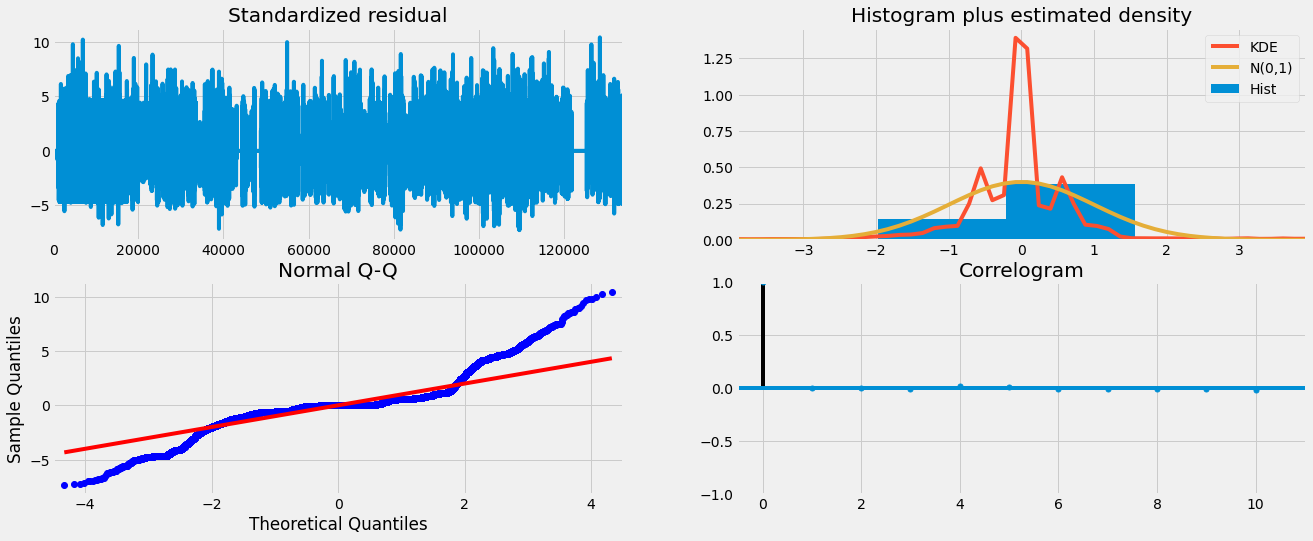

Data fit metrics
Mean Absolute Error:  0.18994624105487612
Mean Squared Error:  0.14500890712602604
Root Mean Squared Error:  0.3808003507430449
R Square Error (Percentage of Variance explained.) 0.8257085652936006
Data Forecast metrics
Forecast RMSE  1.2291795294398375
Forecast R Square  -0.24171902221237285


In [30]:
forecasted, actual = forecast.forecastSarima(30)  # Returns the metrics for 30 values and Dataframe for actual 30 values and forecasted 30 values

In [0]:
# forecasted, actual = forecast.iterateResults('sarima')  # Returns the metrics for various window sizes and dictonaries with actual and forecasted values for different window sizes.